# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import re
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#read the csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# downloading image_predictions.tsv file programatically
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb')as f:
    f.write(response.content)


In [4]:
#read the csv file
image_predictions = pd.read_csv('image_predictions.tsv', sep = "\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#consumer_key = 'HIDDIN'
#consumer_secret = 'HIDDIN'
#access_token = 'HIDDIN'
#access_secret = 'HIDDIN'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
df_list = []
with open('tweet_json.txt', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    # read tweet JSON data line by line
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
twitter_df = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

twitter = twitter_df.reset_index(drop = True)

In [7]:
twitter.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

In [8]:
#accessing twitter archive 
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# looking at the columns of the dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#provide stats about the data
twitter_archive.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
203,853299958564483072,NaN,NaN,2017-04-15 17:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rumpole. He'll be your Uber driver thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853299958...,13,10,Rumpole,None,None,None,None
1866,675349384339542016,6.749998e+17,4.196984e+09,2015-12-11 16:20:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I lied. Here's more. All 13/10 https://t.c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675349384...,13,10,None,None,None,None,None
1942,673711475735838725,NaN,NaN,2015-12-07 03:51:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673711475...,10,10,None,None,None,None,None
310,835309094223372289,NaN,NaN,2017-02-25 02:03:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: So this just changed my life. 1...,7.530398e+17,4.196984e+09,2016-07-13 01:34:21 +0000,"https://vine.co/v/5W2Dg3XPX7a,https://vine.co/...",13,10,None,None,None,None,None
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674743008...,10,10,Sophie,None,None,None,None


In [11]:
image_predictions


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
twitter

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [14]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Quality issues
#### twitter_archive_enhanced

1. Inaccurate Data: The columns doggo, floofer, pupper, and puppo that have none will be replaced with null

2. Inaccurate Data: The Name column that have none will be replaced with null

3. Incorrect Datatype: for tweet_id 

4. Incorrect Datatype: for timestamp

5. Incorrect Data: incorrect names for dogs 

6. Incorrect Data: Dupicate data in expanded_url column and spliting data in the source column 

#### Image_predictions

7. Incorrect Data: Duplicate data in jpg_url column 

8. Incorrect Data: P1, P2, P3 columns need organized case formats and creation of a breed column 

## Tidiness issues
1. Converting doggo, floofer, pupper, and puppo into size column

2. Deleting the retweets, replies @ and associated columns: retweet status id, retweet status user id, retweeted_status_timestamp, data retweet, and replies data


## Cleaning Data

In [15]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_clean = twitter.copy()

### Issue #1 & 2
### Define: The columns doggo, floofer, pupper, and puppo that have none will be replaced with null

### Define: The Name column that have none will be replaced with null

#### Code

In [16]:
#Function for Null
def null(item):
    if item == 'None':
        item = np.NaN
    return item

twitter_archive_clean['name'] = [null(item) for item in twitter_archive_clean['name']]
twitter_archive_clean['doggo'] = [null(item) for item in twitter_archive_clean['doggo']]
twitter_archive_clean['floofer'] = [null(item) for item in twitter_archive_clean['floofer']]
twitter_archive_clean['pupper'] = [null(item) for item in twitter_archive_clean['pupper']]
twitter_archive_clean['puppo'] = [null(item) for item in twitter_archive_clean['puppo']]

#### Test

In [17]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1948,673697980713705472,NaN,NaN,2015-12-07 02:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a tiny pointy pupper. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673697980...,8,10,Pickles,NaN,NaN,pupper,NaN
2289,667174963120574464,NaN,NaN,2015-11-19 02:58:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarence. His face says he doesn't wan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667174963...,9,10,Clarence,NaN,NaN,NaN,NaN
2033,671744970634719232,NaN,NaN,2015-12-01 17:37:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very fit horned dog here. Looks powerful. Not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671744970...,6,10,NaN,NaN,NaN,NaN,NaN
952,751937170840121344,NaN,NaN,2016-07-10 00:32:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. Her ice cube is melting. She doe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751937170...,11,10,Ruby,NaN,NaN,NaN,NaN
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,NaN,NaN,NaN,NaN


### Issue #3&4
### Define: Incorrect data types for timestamp and tweet_id

#### Code

In [18]:
#Change the timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)


In [19]:
#Change the tweet_id to string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)

#### Test

In [20]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), flo

In [21]:
### Issue #5
### Define: Fixing incorrect data involving improper dog names and converting them to null values. 

In [22]:
twitter_archive_clean[twitter_archive_clean.name.str.lower() == twitter_archive_clean.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [23]:
#Convet to null values
twitter_archive_clean['name'] = twitter_archive_clean['name'].apply(lambda x: x if str(x).lower() != x else np.NaN)

In [24]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooey',

In [25]:
#Check for all null values in the `name` column
twitter_archive_clean.name.isnull().sum()

854

In [26]:
#Double check 
twitter_archive_clean[twitter_archive_clean.name.str.lower() == twitter_archive_clean.name].name.unique()

array([], dtype=object)

In [27]:
#######################################################################################################################################

In [28]:
### Issue #6
### Define: Fixing duplicate data in the expanded url column and clean up the source column

In [29]:
sum(twitter_archive_clean.expanded_urls.duplicated())

137

In [30]:
#Drop the Duplicates
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset=['expanded_urls'])

In [31]:
sum(twitter_archive_clean.expanded_urls.duplicated())

0

In [32]:
#Spliting the twitter source data 
twitter_archive_clean.source= twitter_archive_clean.source.str.split('>', expand= True)[1].str.split('</', expand= True)[0]

In [33]:
twitter_archive_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
               ...        
2325    Twitter for iPhone
2326    Twitter for iPhone
2327    Twitter for iPhone
2328    Twitter for iPhone
2329    Twitter for iPhone
2330    Twitter for iPhone
2

In [34]:
#######################################################################################################################################

In [35]:
### Issue #7
### Define: Fixing duplicate data in the jpg url columns

In [36]:
sum(image_predictions.jpg_url.duplicated())

66

In [37]:
#Drop the Duplicates
image_predictions = image_predictions.drop_duplicates(subset=['jpg_url'])

In [38]:
#Check for duplicates again
sum(image_predictions.jpg_url.duplicated())

0

In [39]:
################################################################################################################################################

In [40]:
### Issue #8
### Define: Make the organize the case format in the P1, P2, and P3 columns and create a breed column.

In [41]:
image_predictions_clean['p1'] = [item.capitalize() for item in image_predictions_clean['p1']]
image_predictions_clean['p2'] = [item.capitalize() for item in image_predictions_clean['p2']]
image_predictions_clean['p3'] = [item.capitalize() for item in image_predictions_clean['p3']]

In [42]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

In [43]:
image_predictions_clean.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box turtle,0.933012,False,Mud turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan mastiff,0.058279,True,Fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping cart,0.962465,False,Shopping basket,0.014594,False,Golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493,True,Komondor,0.192305,True,Soft-coated wheaten terrier,0.082086,True


In [44]:
#function used to create a breed column 
def breed_extraction(row):
    breed_conf = 0
    breed_name = ''
    is_breed = False  
    if(row.p1_dog == True):
        if(row.p1_conf >= breed_conf):
            breed_conf = row.p1_conf
            breed_name = row.p1
            is_breed = True
    if(row.p2_dog == True):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p2_conf
            breed_name = row.p2
            is_breed = True
    if(row.p3_dog == True):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p3_conf
            breed_name = row.p3
            is_breed = True
    if is_breed == False:
        return np.nan
    else:
        return breed_name

In [45]:
image_predictions_clean['breed'] = image_predictions_clean.apply(breed_extraction,axis=1)

In [46]:
# make sure the column there 
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater swiss mountain dog,0.016199,True,Bernese mountain dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box turtle,0.933012,False,Mud turtle,0.045885,False,Terrapin,0.017885,False,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan mastiff,0.058279,True,Fur coat,0.054449,False,Chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping cart,0.962465,False,Shopping basket,0.014594,False,Golden retriever,0.007959,True,Golden retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493,True,Komondor,0.192305,True,Soft-coated wheaten terrier,0.082086,True,Miniature poodle


In [47]:
###################################################################################################################################3

In [48]:
###Issue 1
### Define: Converting doggo, floofer, pupper, and puppo into size column


In [49]:
twitter_archive_clean['size'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'])

In [50]:
twitter_archive_clean['size'].value_counts()

pupper     252
doggo       85
puppo       31
floofer      4
Name: size, dtype: int64

In [51]:
###Issue 2
### Define: Deleting the retweets, replies @ and associated columns: retweet status id, retweet status user id, retweeted_status_timestamp, data retweet, and replies data

In [52]:
# Check the replies (@) & retweets (RT)
twitter_archive_clean[twitter_archive_clean.text.str.contains('RT') & twitter_archive_clean.text.str.contains('@')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,size
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,Twitter for iPhone,RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,NaN
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,NaN,pupper
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,Twitter for iPhone,RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,NaN
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,Twitter for iPhone,RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,Twitter for iPhone,RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,pupper


In [53]:
# More checking 
rt_id = (~twitter_archive_clean.retweeted_status_id.isnull())
rt_id.sum()

180

In [54]:
rt_user = (~twitter_archive_clean.retweeted_status_user_id.isnull())
rt_user.sum()

180

In [55]:
rt_time = (~twitter_archive_clean.retweeted_status_timestamp.isnull())
rt_time.sum()

180

In [56]:
twitter_archive_clean = twitter_archive_clean[~rt_id]
twitter_archive_clean = twitter_archive_clean[~rt_user]
twitter_archive_clean = twitter_archive_clean[~rt_time]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
reply_id = (~twitter_archive_clean.in_reply_to_status_id.isnull())
reply_id.sum()


24

In [58]:
reply_user = (~twitter_archive_clean.in_reply_to_user_id.isnull())
reply_user.sum()


24

In [59]:
twitter_archive_clean = twitter_archive_clean[~reply_id]
twitter_archive_clean = twitter_archive_clean[~reply_user]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [60]:
twitter_archive_clean = twitter_archive_clean.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' ,'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp'])

In [61]:
#Double checking replies are erased
twitter_archive_clean[twitter_archive_clean.text.str.contains('RT') & twitter_archive_clean.text.str.contains('@')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,size


In [62]:
# see if all columns are erased 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2015 non-null object
timestamp             2015 non-null datetime64[ns]
source                2015 non-null object
text                  2015 non-null object
expanded_urls         2015 non-null object
rating_numerator      2015 non-null int64
rating_denominator    2015 non-null int64
name                  1332 non-null object
size                  333 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 157.4+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
 twitter_archive_master = twitter_archive_clean.merge(twitter_clean,on='tweet_id').merge(image_predictions_clean,on='tweet_id')

In [64]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [65]:
twitter_archive_master.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,size,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
1293,680440374763077632,2015-12-25 17:30:01,Twitter for iPhone,Merry Christmas. My gift to you is this tiny u...,https://twitter.com/dog_rates/status/680440374...,11,10,NaN,NaN,564,...,Space heater,0.920367,False,Radiator,0.049933,False,Electric fan,0.006719,False,NaN
122,860184849394610176,2017-05-04 17:30:24,Twitter for iPhone,Here we have perhaps the wisest dog of all. Ab...,https://twitter.com/dog_rates/status/860184849...,14,10,NaN,NaN,6295,...,Chimpanzee,0.267612,False,Gorilla,0.104293,False,Orangutan,0.059908,False,NaN
1686,670055038660800512,2015-11-27 01:42:24,Twitter for iPhone,This is Tommy. He's a cool dog. Hard not to st...,https://twitter.com/dog_rates/status/670055038...,3,10,Tommy,NaN,357,...,Snail,0.563631,False,Slug,0.296649,False,Bolete,0.031839,False,NaN
1303,680085611152338944,2015-12-24 18:00:19,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12,10,NaN,NaN,10034,...,Pillow,0.778113,False,Apron,0.095023,False,Wallet,0.049326,False,NaN
1370,676975532580409345,2015-12-16 04:01:59,Twitter for iPhone,This is Cooper. He doesn't know how cheese wor...,https://twitter.com/dog_rates/status/676975532...,11,10,Cooper,NaN,1203,...,Malamute,0.363257,True,Siberian husky,0.245862,True,Eskimo dog,0.125547,True,Malamute
1611,671166507850801152,2015-11-30 03:18:59,Twitter for iPhone,This is Herm. It's his first day of potty trai...,https://twitter.com/dog_rates/status/671166507...,10,10,Herm,NaN,390,...,Refrigerator,0.829772,False,Toilet seat,0.030083,False,Shower curtain,0.015461,False,NaN
1411,675798442703122432,2015-12-12 22:04:39,Twitter for iPhone,This is Bernie. He just touched a boob for the...,https://twitter.com/dog_rates/status/675798442...,10,10,Bernie,NaN,3787,...,Beagle,0.681218,True,Basset,0.125121,True,Boxer,0.080398,True,Beagle
504,778650543019483137,2016-09-21 17:42:10,Twitter for iPhone,Meet Strider. He thinks he's a sorority girl. ...,https://twitter.com/dog_rates/status/778650543...,10,10,Strider,NaN,1729,...,German shepherd,0.515699,True,Malinois,0.300292,True,Kelpie,0.087022,True,German shepherd
1199,685667379192414208,2016-01-09 03:40:16,Twitter for iPhone,This is Marty. He has no idea what happened he...,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,pupper,666,...,Sliding door,0.344526,False,Doormat,0.190027,False,Washbasin,0.046326,False,NaN
1881,666071193221509120,2015-11-16 01:52:02,Twitter for iPhone,Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9,10,NaN,NaN,67,...,Gordon setter,0.503672,True,Yorkshire terrier,0.174201,True,Pekinese,0.109454,True,Gordon setter


In [66]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 23 columns):
tweet_id              1893 non-null object
timestamp             1893 non-null datetime64[ns]
source                1893 non-null object
text                  1893 non-null object
expanded_urls         1893 non-null object
rating_numerator      1893 non-null int64
rating_denominator    1893 non-null int64
name                  1291 non-null object
size                  303 non-null object
retweet_count         1893 non-null int64
favorite_count        1893 non-null int64
jpg_url               1893 non-null object
img_num               1893 non-null int64
p1                    1893 non-null object
p1_conf               1893 non-null float64
p1_dog                1893 non-null bool
p2                    1893 non-null object
p2_conf               1893 non-null float64
p2_dog                1893 non-null bool
p3                    1893 non-null object
p3_conf               1893 non-nu

## Analyzing and Visualizing Data


### Insights:

1.The most popular dog names? 

2.The most popular breed? 

3.The most popular source to access Twitter?

4.The popular size of dog?

### Visualization

Sadie       8
Penny       9
Tucker      9
Cooper      9
Oliver      9
Charlie    10
Lucy       10
Name: name, dtype: int64


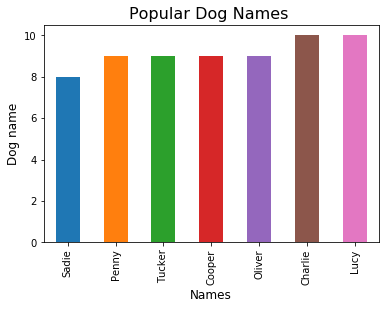

In [67]:
# popular dog name

twitter_archive_master['name'].value_counts()[0:7].sort_values(ascending=True).plot(kind='bar')

plt.xlabel('Names',size=12)
plt.ylabel('Dog name', size= 12)
plt.title('Popular Dog Names ', size= 16);
print(twitter_archive_master['name'].value_counts().head(7).sort_values(ascending=True))

In [68]:
print('As we see above there are Charlie and Lucy are equally popular in this dataset.')

As we see above there are Charlie and Lucy are equally popular in this dataset.


In [69]:
###########################################################################################################################################

Malamute               31
Pomeranian             37
Toy poodle             41
Samoyed                41
Chow                   47
Pug                    62
Chihuahua              86
Pembroke               90
Labrador retriever    103
Golden retriever      142
Name: breed, dtype: int64


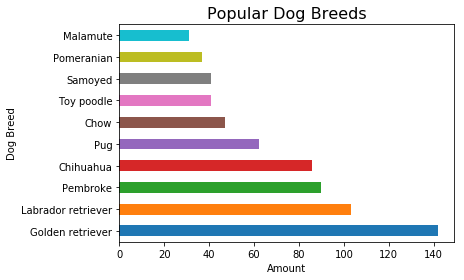

In [70]:
# popular dog breed 
dog_breed = twitter_archive_master.breed.value_counts().head(10)
dog_breed.plot(kind='barh')
plt.xlabel('Amount');
plt.ylabel('Dog Breed');
plt.title('Popular Dog Breeds',size= 16);
print(dog_breed.head(10).sort_values(ascending=True))

In [71]:
print('The chart displays that golden retrievers are the most popular breed in this dataset. ')

The chart displays that golden retrievers are the most popular breed in this dataset. 


In [72]:
#######################################################################################################################################

TweetDeck               10
Twitter Web Client      28
Twitter for iPhone    1855
Name: source, dtype: int64


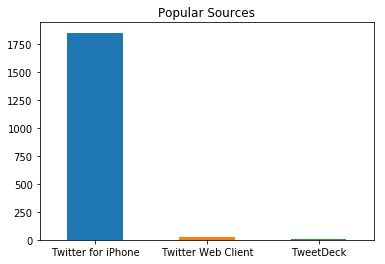

In [73]:
# Popular source 
source = twitter_archive_master.source.value_counts()
source.plot(kind='bar')
plt.xticks(rotation=None);
plt.title('Popular Sources');
print(source.head().sort_values(ascending=True))

In [74]:
print('As displayed above, most user access twitter with their iphones')

As displayed above, most user access twitter with their iphones


In [75]:
##############################################################################################################################################

floofer      3
puppo       25
doggo       66
pupper     209
Name: size, dtype: int64


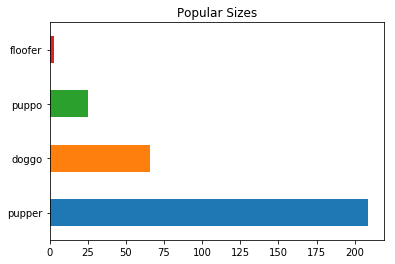

In [76]:
# dog size chart
dog_size = pd.Series(twitter_archive_master['size']).value_counts()
dog_size.plot(kind='barh')
plt.xticks(rotation=None);
plt.title('Popular Sizes');
print(dog_size.head().sort_values(ascending=True))

In [77]:
print('This graph displays the most popular dog size is a pupper.')

This graph displays the most popular dog size is a pupper.
